In [1]:
import sys
import os
demo_dir = os.path.abspath(".")
parent_dir = os.path.dirname(demo_dir) # feels very hacky just as a way to avoid pip install -e. 
sys.path.append(parent_dir)

from MaterialPropertyPredictor import MPRLoader, RandomForestBandGapModel, GradientBoostingBandGapModel
import matplotlib.pyplot as plt

from sklearn import metrics

c:\git\rewotes\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def generate_parity_plot(y, pred, title):
    rmse = metrics.mean_absolute_error(y, pred)  
    rmse = round(rmse, 2)
    plt.figure(figsize=(6, 6)) 
    plt.plot(y, pred, 'ro', markersize=8, markerfacecolor='red')
    max_value = max(max(y), max(pred))
    plt.plot([0, max_value], [0, max_value], 'k-', lw=2)

    plt.xlabel('y')
    plt.ylabel('pred')
    plt.xlim(0, max_value)
    plt.ylim(0, max_value)
    plt.gca().set_aspect('equal', adjustable='box') 
    plt.box(True)
    plt.grid(False) 
    plt.title(title + " RMSE: " + str(rmse))
    plt.show()

In [4]:
api_key = input("API key: ")

API key:  yKDyZrX3LGe09wvygtdnQwTnNwrF36JR


In [5]:
loader = MPRLoader(
    n_eigenvals=10
)
loader.load_data(
    api_key, 
    distance_method='fast',
    chemsys=["Fe", "O", "Si", "Fe-O", "Si-O", "Si-Fe", "Si-Fe-O"]
)

c:\git\rewotes\.venv\lib\site-packages\mp_api\client\mprester.py:193: UserWarning: mpcontribs-client not installed. Install the package to query MPContribs data, or construct pourbaix diagrams: 'pip install mpcontribs-client'
  warnings.warn(
Retrieving SummaryDoc documents: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 610/610 [00:00<?, ?it/s]


In [ ]:
randomforest_model = RandomForestBandGapModel()
randomforest_model.fit(loader)
y, pred = randomforest_model.parity(loader)
generate_parity_plot(y, pred, "Random Forest")

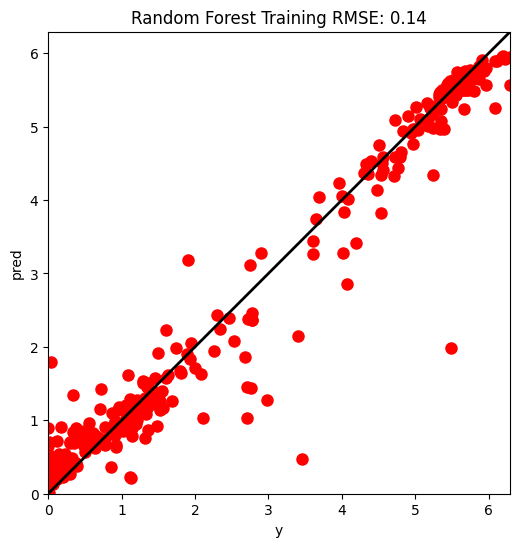

In [8]:
y, pred = randomforest_model.parity(loader, test_data_only=False)
generate_parity_plot(y, pred, "Random Forest Training")

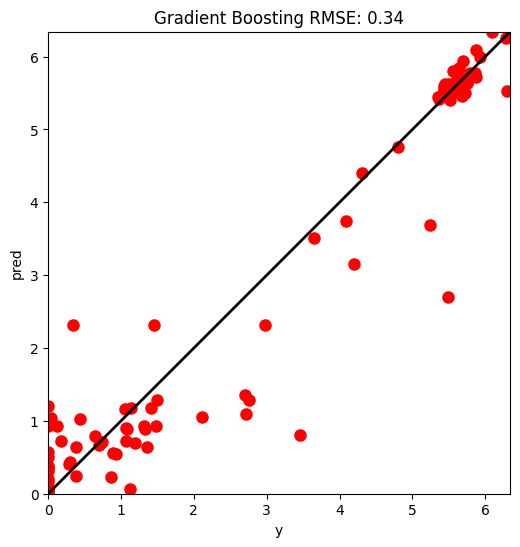

In [9]:
gradientboosting_model = GradientBoostingBandGapModel()
gradientboosting_model.fit(loader)
y, pred = gradientboosting_model.parity(loader)
generate_parity_plot(y, pred, "Gradient Boosting")

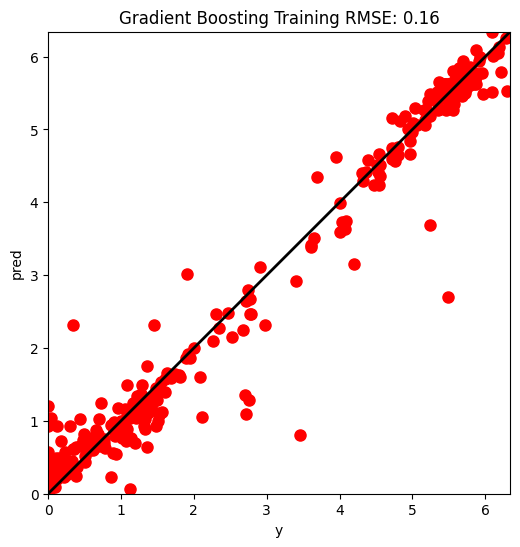

In [10]:
y, pred = gradientboosting_model.parity(loader, test_data_only=False)
generate_parity_plot(y, pred, "Gradient Boosting Training")

In [11]:
fi = randomforest_model.model.feature_importances_
n = len(loader.elemental_fraction_vectors[1])
print("vol          ->", fi[0] * 100)
print("lattice vecs ->", fi[1:4] * 100)
print("lattice angs ->", fi[4:7] * 100)
print("mass density ->", fi[7] * 100)
print("atom density ->", fi[8] * 100)
print("is it metal? ->", fi[9] * 100)
print("number atoms ->", fi[10] * 100)
print("eng per atom ->", fi[11] * 100)
print("Coord 3Angst ->", fi[12:14] * 100)
print("Coord 2Angst ->", fi[14:16] * 100)
print("Coord 1Angst ->", fi[16:18] * 100)
print("Compositions ->", fi[18:18+n] * 100)
print("sum Eigenval ->", sum(fi[18+n:]) * 100)
print("Checksum 100 ->", sum(fi * 100))

vol          -> 0.2142503869933048
lattice vecs -> [0.16403965 0.22457721 0.14573862]
lattice angs -> [0.18249219 0.13755082 0.11528523]
mass density -> 0.8147220157386834
atom density -> 0.20131281279079555
is it metal? -> 2.8002421436647036
number atoms -> 0.09632179063843187
eng per atom -> 71.66258183324956
Coord 3Angst -> [0.23337498 0.48541303]
Coord 2Angst -> [16.82683622  0.42899729]
Coord 1Angst -> [0. 0.]
Compositions -> [1.15932754 1.47377265 1.31944836]
sum Eigenval -> 1.3137152237614458
Checksum 100 -> 100.00000000000001
